In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = r"C:\Users\R\Downloads\diabetes - diabetes.csv"
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [54]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [55]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [56]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

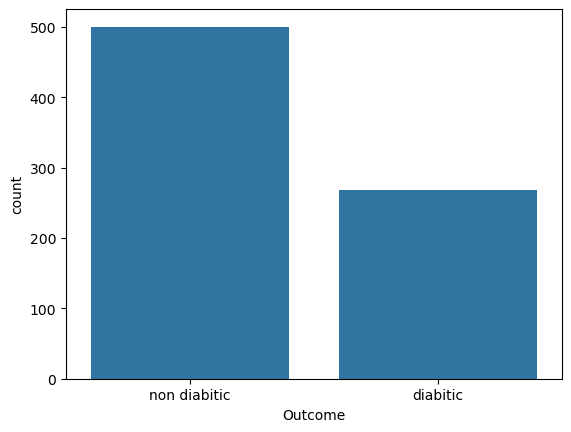

In [57]:
sns.countplot(x='Outcome', data=df)
plt.xticks([0,1],['non diabitic','diabitic'])
plt.show()

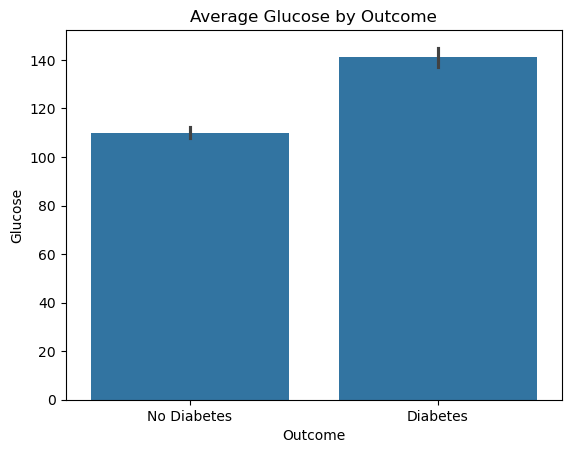

In [58]:
sns.barplot(x='Outcome', y='Glucose', data=df)
plt.xticks([0,1], ['No Diabetes','Diabetes'])
plt.title("Average Glucose by Outcome")
plt.show()

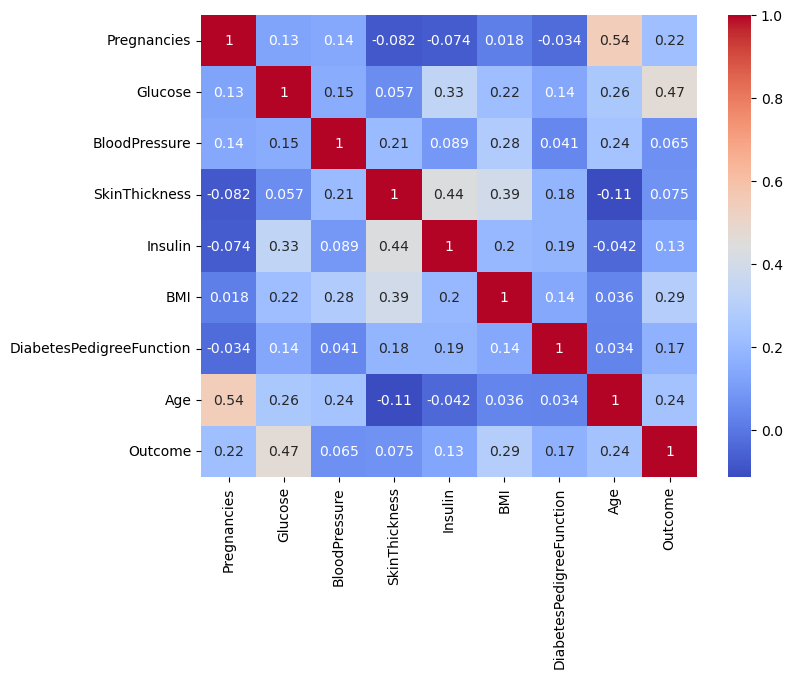

In [59]:
correlation_matrix = df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(
  correlation_matrix,
  annot=True,
  cmap='coolwarm'
)
plt.show()

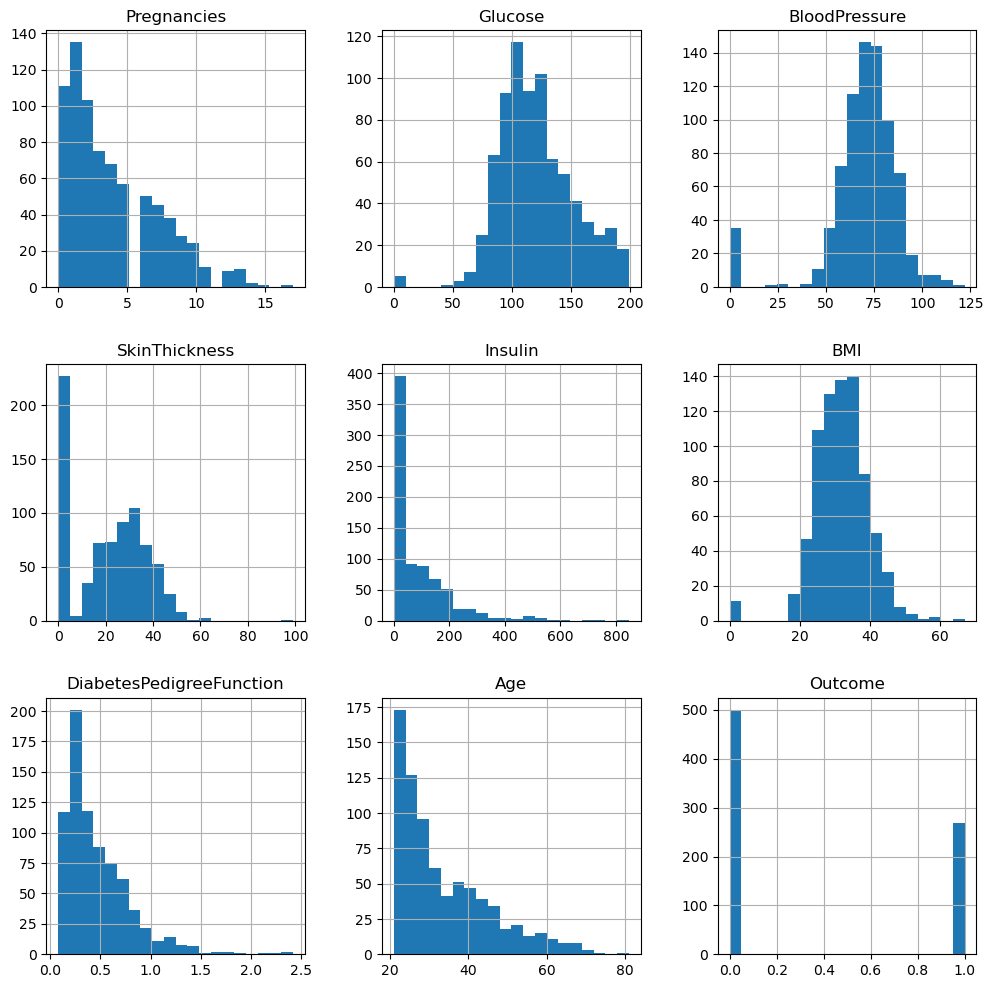

In [60]:
df.hist(figsize=(12,12),bins=20)
plt.show()

In [61]:
print(df.groupby('Outcome')['BMI'].mean(),'\n')
df[['BMI','Outcome']].corr()


Outcome
0    30.304200
1    35.142537
Name: BMI, dtype: float64 



,BMI,Outcome
BMI,1.000000,0.292695
Outcome,0.292695,1.000000


In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

x = df.drop('Outcome', axis=1)
y = df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(
  x, y, test_size=0.2, random_state=42, stratify=y
)

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred),'\n')

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred),'\n')

# Precision, Recall, F1-score
print("Classification Report:\n", classification_report(y_test, y_pred),'\n')


Accuracy: 0.7142857142857143 

Confusion Matrix:
 [[82 18]
 [26 28]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154
 



In [64]:
from sklearn.ensemble import RandomForestClassifier

rd_model = RandomForestClassifier(n_estimators=100, random_state=42)
rd_model.fit(x_train_scaled, y_train)

y_pred = rd_model.predict(x_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred),'\n')
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred),'\n')
print("Classification Report:\n", classification_report(y_test, y_pred),'\n')

Accuracy: 0.7597402597402597 

Confusion Matrix:
 [[85 15]
 [22 32]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154
 



In [65]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1.0,gamma='scale',probability=True,random_state=42)
svm_model.fit(x_train_scaled, y_train)

y_pred = svm_model.predict(x_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred), '\n')
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred), '\n')
print("Classification Report:\n", classification_report(y_test, y_pred), '\n')

Accuracy: 0.7532467532467533 

Confusion Matrix:
 [[83 17]
 [21 33]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81       100
           1       0.66      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154
 



In [66]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],         
    'penalty': ['l1', 'l2'],        
    'solver': ['liblinear']     
}

log_reg = LogisticRegression(max_iter=1000)

grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV logistic regression  Accuracy:", grid_search.best_score_)

Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV logistic regression  Accuracy: 0.7801679328268692


In [67]:
param_grid = {
  'n_estimators': [50, 100, 200],
  'max_depth': [None, 5, 10],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV random forest Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best CV random forest Accuracy: 0.7834332933493269


In [68]:
param_grid = {
  'C': [0.1, 1, 10],
  'gamma': [0.01, 0.1, 1],
  'kernel': ['rbf', 'linear']
}

grid = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='accuracy')
grid.fit(x_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV svm Score:", grid.best_score_)

Best Parameters: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Best CV svm Score: 0.7785285885645741


In [69]:
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(x_test_scaled, y_test)
print('Best model:', best_model)
print("Test Accuracy:", test_accuracy)

Best model: RandomForestClassifier(max_depth=5, min_samples_leaf=2, n_estimators=50,
                       random_state=42)
Test Accuracy: 0.7337662337662337


In [ ]:
chosen_model = RandomForestClassifier(max_depth=5, min_samples_leaf=2,
                                      n_estimators=50, random_state=42)
chosen_model.fit(x_train_scaled, y_train)

def predict_diabities(patient_data):
  patient_array = np.array(patient_data).reshape(1, -1)
  
  patient_scaled = scaler.transform(patient_array)
  
  prediction = chosen_model.predict(patient_scaled)[0]
  probability = chosen_model.predict_proba(patient_scaled)[0][1]
  
  if prediction == 1:
        return f"🔴 Diabetic (Probability: {probability:.2f})"
  else:
        return f"🟢 Non-Diabetic (Probability: {probability:.2f})"

In [71]:
new_patient = [2, 120, 70, 25, 80, 28.5, 0.5, 32]
print(predict_diabities(new_patient))

🟢 Non-Diabetic (Probability: 0.22)


c:\Users\R\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [73]:
import streamlit as st

st.title('Diabities prediction app')

Pregnancies = st.number_input('Pregnancies', 0, 20)
Glucose = st.number_input('Glucose', 0, 200)
Bp = st.number_input('BloodPressure', 0, 150)
St = st.number_input('SkinThickness', 0, 100)
Insulin = st.number_input('Insulin', 0, 900)
BMI = st.number_input('BMI', 0.0, 80.0)
Dpf = st.number_input('Diabetes Pedigree Function', 0.0, 3.0)
Age = st.number_input('Age', 1, 90)

if st.button('predict'):
  patient = [Pregnancies, Glucose, Bp, St, Insulin, BMI, Dpf, Age]
  result = predict_diabities(patient)
  st.success(result)

2025-09-09 04:32:12.833 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-09 04:32:12.834 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-09 04:32:12.835 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-09 04:32:12.835 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-09 04:32:12.836 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-09 04:32:12.837 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-09 04:32:12.838 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-09 04:32:12.839 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar